# СЛАУ
## Прямые и итерационные методы решения.

Цыбулин Иван ([tsybulin@crec.mipt.ru](mailto:tsybulin@crec.mipt.ru))

## Методы решения СЛАУ
* Прямые методы &mdash; выдают решение за фиксированное число операций
* Итерационные методы &mdash; строят последовательность *приближений* к решению. Последовательность обрывают после достижения заданной точности.

## Метод Гаусса
* Метод последовательного исключения неизвестных
* Прямым ходом приводит матрицу системы к треугольному виду, а затем находит решение полученной треугольной системы обратной подстановкой
* Для системы $n \times n$ количество арифметических действий $O(n^3)$ (примерно $\frac23 n^3$ умножений) &mdash; прямой метод.

Рассмотрим систему
$$
\begin{pmatrix}
    10^{-3}&1\\
    1&-1
\end{pmatrix}
\begin{pmatrix}
    x_1\\x_2
\end{pmatrix} =
\begin{pmatrix}
    2\\1
\end{pmatrix}
\qquad
\begin{pmatrix}
    x_1\\x_2
\end{pmatrix} \approx
\begin{pmatrix}
    2.997003\\
    1.997003
\end{pmatrix}
$$

Будем решать ее методом Гаусса, используя в вычислениях только три значащие цифры
$$
\left(
\begin{array}{@{}cc|c@{}}
    10^{-3}&1&2\\
    1&-1&1
\end{array}
\right)
\sim
\left(
\begin{array}{@{}cc|c@{}}
    1&10^3&2\cdot10^3\\
    1&-1&1
\end{array}
\right)
\sim
\left(
\begin{array}{@{}cc|c@{}}
    1&10^3&2\cdot10^3\\
    0&\color{red}{-10^3}&\color{red}{-2\cdot10^3}\\
\end{array}
\right)
\sim \\
\left(
\begin{array}{@{}cc|c@{}}
    1&10^3&2\cdot10^3\\
    0&-10^3&-2\cdot10^3\\
\end{array}
\right)
\sim
\left(
\begin{array}{@{}cc|c@{}}
    1&10^3&2\cdot10^3\\
    0&1&2\\
\end{array}
\right)
\sim
\left(
\begin{array}{@{}cc|c@{}}
    1&0&0\\
    0&1&2\\
\end{array}
\right)
$$
Полученное решение значительно отличается от точного.

Данную проблему можно устранить, если в качестве ведущего элемента (того на который делится очередная строка)
выбирать наибольший по модулю элемент в столбце. Такой метод
называется методом Гаусса с выбором главного элемента по столбцу.

Применим его к той же системе
$$
\left(
\begin{array}{@{}cc|c@{}}
    10^{-3}&1&2\\
    \fbox{1}&-1&1
\end{array}
\right)
\sim
\left(
\begin{array}{@{}cc|c@{}}
    0&\color{red}{\fbox{1}}&\color{red}{2}\\
    1&-1&1\\
\end{array}
\right)
\sim
\left(
\begin{array}{@{}cc|c@{}}
    0&1&2\\
    1&0&3\\
\end{array}
\right)
\sim
\left(
\begin{array}{@{}cc|c@{}}
    1&0&3\\
    0&1&2\\
\end{array}
\right)
$$

Теперь отличие от точного решения не превосходит $3 \cdot 10^{-3}$, что
оказалось даже меньше погрешности вычислений.

Почему же так происходит? Может система просто *плохо обусловлена*? Проверим.
$$
\nu(\mathbf A, \mathbf b) = \frac{\|\mathbf A^{-1}\| \|\mathbf b\|}{\|\mathbf A^{-1} \mathbf b\|}\\
\mathbf A^{-1} = \frac{1}{1001}\begin{pmatrix}
1000 & 1000\\
1000 & -1
\end{pmatrix} \qquad
\mathbf b = \begin{pmatrix}
    2\\
    1
\end{pmatrix} \qquad
\mathbf A^{-1}\mathbf b \approx \begin{pmatrix}
    2.997003\\
    1.997003
\end{pmatrix}\\
\nu_\infty = \frac{2000}{1001} \frac{3}{2.997003} \approx 2.
$$
Данная система *обусловлена хорошо*. Проблема в методе Гаусса. В методе Гаусса могут накапливаться *ошибки округления*.

## Диагональное преобладание
Говорят, что матрица $\mathbf A = \{a_{ij}\}_{i,j=1}^n$ обладает (нестрогим) **диагональным преобладанием**, если
$$
|a_{ii}| \geqslant \sum_{j \neq i} |a_{ij}|, \quad \forall i = 1,\dots,n
$$
Преобладание называется строгим, если 
$$
|a_{ii}| > \sum_{j \neq i} |a_{ij}|, \quad \forall i = 1,\dots,n.
$$

Для матриц с диагональным преобладанием в методе Гаусса без выбора ведущего элемента не происходит значительного накопления ошибок округления. Как говорят, для этих матриц метод Гаусса **вычислительно устойчив**.

## Трехдиагональные системы
При решении дифференциальных уравнений нередко возникает линейная система специального трехдиагонального вида
$$
\left\{
\begin{array}{}
b_1 x_1 &+& c_1 x_2 &&&&&&& = &f_1\\
a_2 x_1 &+& b_2 x_2 &+& c_2 x_3 &&&&& = &f_2\\
&&a_3 x_2 &+& b_3 x_3 &+& c_3 x_4 &&& = &f_3\\
&&&&&\ddots\\
&&&&a_{n-1} x_{n-2} &+& b_{n-1} x_{n-1} &+& c_{n-1} x_n & = &f_{n-1}\\
&&&&&& a_n x_{n-1} &+& b_n x_n & = & f_n\\
\end{array}
\right.
$$
Все уравнения имеют вид
$$
a_{k} x_{k-1} + b_{k} x_k + c_{k} x_{k+1} = f_k, \quad k = 1,\dots,n\\
a_1 = c_n = 0
$$

# Прогонка
Для системы с трехдиагональной матрицей можно реализовать метод Гаусса, имеющий сложность $O(n)$ действий вместо $O(n^3)$. Данный метод называется *прогонкой*.

Будем искать решение в виде *прогоночного соотношения*
$$
x_{k-1} = P_k x_k + Q_k,
$$
где $P_k, Q_k$ &mdash; пока не известные *прогоночные коэффициенты*.

Первое уравнение легко переписать в виде прогоночного соотношения:
$$
b_1 x_1 + c_1 x_2 = f_1 \implies x_1 = -\frac{c_1}{b_1} x_2 + \frac{f_1}{b_1} \implies 
P_2 = -\frac{c_1}{b_1}, \; Q_2 = \frac{f_1}{b_1}
$$

Пусть мы знаем прогоночные коэффициенты до $P_{k}, Q_{k}$ включительно.
$$
x_{k-1} = P_k x_k + Q_k
$$
Подставим это сооношение в уравнение с номером $k$
$$
a_{k} x_{k-1} + b_k x_k + c_k x_{k+1} = f_k\\
a_{k} (P_k x_k + Q_k) + b_k x_k + c_k x_{k+1} = f_k\\
x_k = -\frac{c_k}{a_k P_{k} + b_k} x_{k+1} + \frac{f_k - a_k Q_k}{a_k P_{k} + b_k}
$$
Мы получили рекуррентные формулы для вычисления $P_{k+1}, Q_{k+1}$:
$$
P_{k+1} = -\frac{c_k}{a_k P_{k} + b_k}, \quad Q_{k+1} = \frac{f_k - a_k Q_k}{a_k P_k + b_k}.
$$

Начиная с $P_2, Q_2$ прямым ходом прогонки можно последовательно вычислить $P_k, Q_k$ для $k = 3, 4, \dots, n+1$. Для последнего уравнения $c_n = 0$ и $P_{n+1} = 0$. Прогоночное соотношение для $x_n$ принимает вид
$$
x_n = Q_{n+1}.
$$
Теперь обратной подстановкой можно найти остальные неизвестные:
$$\begin{aligned}
x_{n-1} &= P_n x_n + Q_n\\
x_{n-2} &= P_{n-1} x_{n-1} + Q_{n-1}\\
&\;\;\vdots\\
x_1 &= P_2 x_2 + Q_2.
\end{aligned}
$$

In [68]:
import numpy as np

def solve_tdm(a, b, c, f):
    n = len(a)
    P = np.zeros(n); Q = np.zeros(n); x = np.zeros(n)
    P[0] = -c[0] / b[0]
    Q[0] = f[0] / b[0]
    for k in range(n-1):
        P[k+1] = -c[k+1] / (a[k+1] * P[k] + b[k+1])
        Q[k+1] = (f[k+1] - a[k+1] * Q[k]) / (a[k+1] * P[k] + b[k+1])
    x[n-1] = Q[n-1]
    for k in reversed(range(n-1)):
        x[k] = P[k] * x[k+1] + Q[k]
    return x

In [69]:
from scipy.linalg import solve_banded

a =  np.array([0, 1, 1, 1, 1, 1, 1, 1])
b = -np.array([2, 2, 2, 2, 2, 2, 2, 2])
c =  np.array([1, 1, 1, 1, 1, 1, 1, 0])
f = -np.array([1, 1, 1, 1, 1, 1, 1, 1])
x = solve_tdm(a, b, c, f)
print('TDM solver: x=', x)

G = np.zeros((3, len(a)))
G[0, 1:]  = c[:-1]
G[1, :]   = b
G[2, :-1] = a[1:]
x_scipy = solve_banded((1, 1), G, f)
print('SciPy banded solver: x=', x_scipy)

TDM solver: x= [  4.   7.   9.  10.  10.   9.   7.   4.]
SciPy banded solver: x= [  4.   7.   9.  10.  10.   9.   7.   4.]


## Матричные разложения
Довольно часто для решения систем линейных уравнений и других задач линейной алгебры применяют *матричные разложения*. Наиболее известными являются:
* $\mathbf A = \mathbf {LU}$, где $\mathbf L$ &mdash; нижнетреугольная матрица, а $\mathbf U$ &mdash; верхнетреугольная. Соответствует методу Гаусса без выбора главного элемента.
* $\mathbf A = \mathbf {LL}^\top$ &mdash; разложение Холецкого, применяется вместо LU для симметричных матриц.
* $\mathbf A = \mathbf {QR}$, где $\mathbf Q$ &mdash; ортогональная, а $\mathbf R$ &mdash; верхнетреугольная. Также может быть использовано для решения СЛАУ.

Эти разложения имеют сложность $O(n^3)$, как и метод Гаусса.

Другие важные разложения:
* $\mathbf A = \mathbf U \mathbf \Sigma \mathbf V$ &mdash; сингулярное разложение, $\mathbf U, \mathbf V$ &mdash; ортогональные, $\mathbf \Sigma$ &mdash; диагональная матрица из сингулярных чисел.
* $\mathbf A = \mathbf S \mathbf \Lambda \mathbf S^{-1}$ &mdash; спектральное разложение, $\mathbf S$ &mdash; матрица из собственных векторов, $\mathbf \Lambda$ &mdash; диагональная матрица собственных чисел.

Получение таких разложений &mdash; трудоемкая задача. Более того, эти разложения получаются итерационными методами, сложность алгоритма зависит от матрицы $\mathbf A$.

Покажем, как решить линейную систему, зная LU разложение ее матрицы: пусть $\mathbf A = \mathbf{LU}$. Система
$$
\mathbf {Ax} = \mathbf {f}
$$
может быть записана в виде:
$$
\mathbf{L}(\mathbf{Ux}) = \mathbf{f}.
$$
Решим сначала вспомогательную задачу с нижнетреугольной матрицей (прямой подстановкой)
$$
\mathbf{Ly} = \mathbf{f},
$$
а затем задачу с верхнетреугольной матрицей (обратной подстановкой)
$$
\mathbf{Ux} = \mathbf{y}.
$$

In [73]:
from scipy.linalg import lu, solve_triangular
def lu_solve(A, f):
    P, L, U = lu(A) # A = P L U
    y = solve_triangular(L, P.T.dot(f), lower=True, unit_diagonal=True)
    x = solve_triangular(U, y, lower=False, unit_diagonal=False)
    return x

n = 4
x0 = np.ones(n)
A = np.random.rand(n, n)
f = A.dot(x0)
x = lu_solve(A, f)
print('x = ', x)
lu(A)

x =  [ 1.  1.  1.  1.]


(array([[ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.]]),
 array([[ 1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.05387288,  1.        ,  0.        ,  0.        ],
        [ 0.29155253, -0.49537567,  1.        ,  0.        ],
        [ 0.23474376,  0.36296334, -0.05152276,  1.        ]]),
 array([[ 0.68909497,  0.85414561,  0.61833471,  0.61908931],
        [ 0.        ,  0.48241359,  0.58121431,  0.07199777],
        [ 0.        ,  0.        ,  0.6906763 ,  0.11064974],
        [ 0.        ,  0.        ,  0.        ,  0.52312958]]))

# Итерационные методы решения СЛАУ

Итерационные методы для системы 
$$
\mathbf{Ax} = \mathbf{f}
$$
строят последовательность приближений
$$
\mathbf x_1, \mathbf x_2, \mathbf x_3, \dots,
$$
которая сходится к решению системы $\mathbf x^*$. Итерационным методам необходимо начальное приближение к решению $\mathbf x_0$.

## Метод простой итерации
Пусть итерационный метод строит новое приближение $\mathbf x_{k+1}$ по правилу
$$
\mathbf x_{k+1} = \mathbf {Bx}_k + \mathbf F. \tag{*}
$$
Назовем $\mathbf B$ *матрицей итераций*.

Отвлечемся от исходной системы $\mathbf{Ax} = \mathbf f$ и ответим на вопросы
* Когда сходится метод $(\text{*})$, то есть когда последовательность $\mathbf x_{k}$ стремится к какому-то $\mathbf x^*$?
* К чему сходится метод, то есть что такое $\mathbf x^*$?

Пусть последовательность $\mathbf x_k$ сходится к некоторому $\mathbf x^*$. Тогда переходя в 
$$
\mathbf x_{k+1} = \mathbf {Bx}_k + \mathbf F
$$
к пределу при $k \to \infty$, получаем
$$
\mathbf x^* = \mathbf {Bx}^* + \mathbf F.
$$
То есть, если предел $\mathbf x_k$ существует, то он &mdash; решение уравнения
$$
\mathbf x^* = \mathbf {Bx}^* + \mathbf F.
$$

Рассмотрим вопрос сходимости метода простой итерации
$$
\mathbf x_{k+1} = \mathbf {Bx}_k + \mathbf F\\
\mathbf x^* = \mathbf {Bx}^* + \mathbf F
$$
Вычитая второе соотношение из первого, получаем
$$
\mathbf x_{k+1} - \mathbf x^* = \mathbf B (\mathbf x_k - \mathbf x^*).
$$
Вектор $\mathbf e_k = \mathbf x_k - \mathbf x^*$ будем называть *вектором ошибки*. За одну итерацию вектор ошибки умножается на матрицу итераций $\mathbf B$.

$$
\mathbf e_{k+1} = \mathbf {Be}_{k}.
$$
Условие $\mathbf x_k \to \mathbf x^*$ эквивалентно $\|\mathbf x_k - \mathbf x^*\| \equiv \|\mathbf e_k\| \to 0$. Здесь годится любая норма.

## Достаточное условие сходимости

Если **какая-то** норма матрицы $\mathbf B$ оказалась меньше $1$, то метод простой итерации
$$
\mathbf x_{k+1} = \mathbf {Bx}_k + \mathbf F
$$
сходится при любом начальном приближении $\mathbf x_0$ и любой правой части $\mathbf F$. Действительно, пусть
$$
q = \|\mathbf B\| < 1.
$$
Тогда
$$
\|\mathbf e_{k+1}\| = \|\mathbf {Be}_k\| \leqslant \|\mathbf B\| \cdot \|\mathbf e_k\| = q \|\mathbf e_k\| \leqslant \cdots
\leqslant q^{k+1} \|\mathbf e_0\|.
$$
Норма ошибки стремится к нулю как геометрическая прогрессия со знаменателем $q < 1$. Сходимость со скоростью геометрической прогрессии называют еще *линейной сходимостью*.

## Критерий сходимости
Для того, чтобы метод простой итерации
$$
\mathbf x_{k+1} = \mathbf {Bx}_k + \mathbf F
$$
сходился при любом начальном приближении $\mathbf x_0$ и любой правой части $\mathbf F$ **необходимо и достаточно**, чтобы
$$
|\lambda(\mathbf B)| < 1,
$$
то есть все собственные числа $\mathbf B$ должны попасть в единичный круг $|\lambda| < 1, \lambda \in \mathbb C$. 

Для симметричной матрицы
$$
\|\mathbf B\|_E = \max |\lambda(\mathbf B)|,
$$
так что условие $\|\mathbf B\|_E < 1$ является не только достаточным, но и необходимым для сходимости процесса.

Как же можно по данной системе
$$
\mathbf {Ax} = \mathbf f
$$
построить итерационный процесс
$$
\mathbf x_{k+1} = \mathbf {Bx}_k + \mathbf F,
$$
который бы сходился к решению системы?

Вспомним, что итерационный процесс сходится к решению уравнения
$$
\mathbf x = \mathbf{Bx} + \mathbf F.
$$
Преобразуем $\mathbf {Ax} = \mathbf f$ к такому виду.

## Метод простой итерации с параметром
Введем вектор невязки
$$
\mathbf r_k = \mathbf {Ae}_k = \mathbf {Ax}_k - \mathbf f.
$$
Рассмотрим процесс с некоторым фиксированным $\tau \neq 0$.
$$
\mathbf x_{k+1} = \mathbf x_k - \tau \mathbf r_k\\
\mathbf x_{k+1} = \mathbf x_k - \tau \mathbf{Ax}_k + \tau \mathbf f = (\mathbf E - \tau \mathbf A) \mathbf x_k + \tau \mathbf f.
$$
Мы получили процесс с матрицей итераций $\mathbf B = \mathbf E - \tau \mathbf A$ и $\mathbf F = \tau \mathbf f$, который сходится к решению
$$
\mathbf x = (\mathbf E - \tau \mathbf A)\mathbf x + \tau \mathbf f,
$$
что эквивалентно исходной системе.

## Сходимость метода с параметром

Запишем необходимое и достаточное условие $|\lambda (\mathbf B)| < 1$ через собственные числа матрицы $\mathbf A$.
$$
\lambda(\mathbf B) = \lambda(\mathbf E - \tau \mathbf A) = 1 - \tau \lambda(\mathbf A)\\
|\lambda(\mathbf B)| = |1 - \tau \lambda(\mathbf A)| < 1
$$

Последнее условие показывает, что собственные числа матрицы $\mathbf A$ должны лежать внутри единичного круга радиуса $\frac{1}{\tau}$ с центром в $\frac{1}{\tau}$.

Для симметричных положительно определенных матриц $\mathbf A = \mathbf A^\top > 0$ собственные числа лежат на отрезке
$\lambda(\mathbf A) \in [\lambda_{\min}, \lambda_{\max}]$

Необходимое и достаточное условие сходимости будет иметь вид
$$
0 < \lambda_\min < \lambda_\max < \frac{2}{\tau} \Leftrightarrow 0 < \tau < \frac{2}{\lambda_\max}
$$

In [114]:
def simple_iteration(A, f, x0, tau, maxit=1000, eps=1e-6):
    x = x0.copy()
    it = 0
    res = []
    while it < maxit:
        r = A.dot(x) - f
        x = x - tau * r
        res.append(np.linalg.norm(r))
        if np.linalg.norm(r) < eps:
            return x, res
        it += 1
    print('Method has not converged in %d iterations' % maxit)
    return x, res

lambda(A) = [  0.16969125   1.52638833  19.30392042]
tau = 0.12
Method has not converged in 1000 iterations


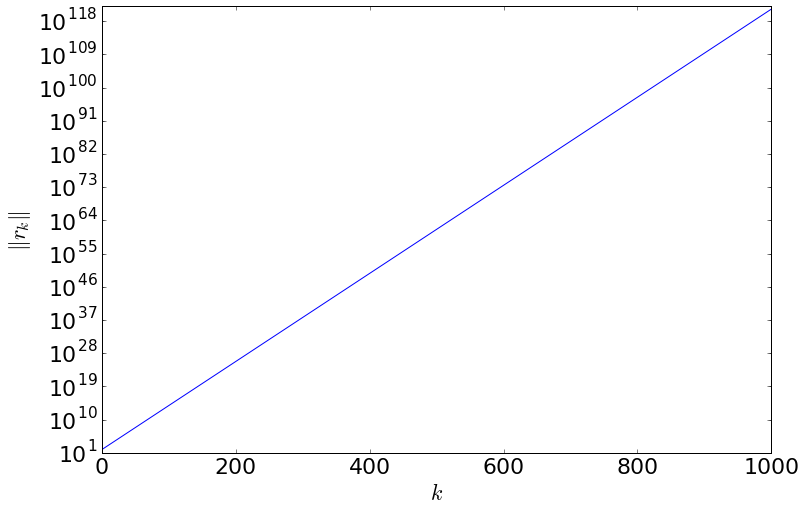

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', **{'size' : 22})

A = np.array([[1, 2, 3], [2, 5, 7], [3, 7, 15]])
xstar = np.array([1, 2, 3])
f = A.dot(xstar)
x0 = np.array([0, 0, 0])

print('lambda(A) =', np.linalg.eigvalsh(A))

tau = 0.12
print('tau =', tau)
x, res = simple_iteration(A, f, x0, tau)
plt.figure(figsize=(12,8))
plt.semilogy(res)
plt.xlabel('$k$')
plt.ylabel('$\|r_k\|$')
plt.show()

lambda(A) = [  0.16969125   1.52638833  19.30392042]
tau = 0.1


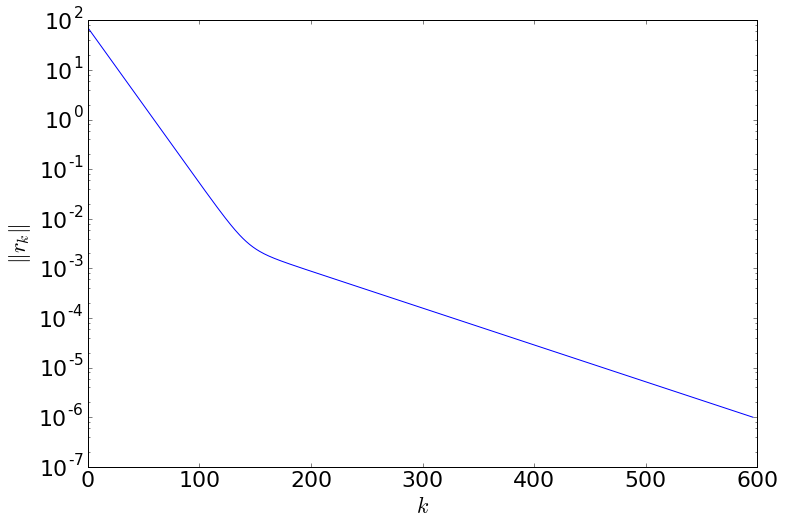

In [118]:
print('lambda(A) =', np.linalg.eigvalsh(A))

tau = 0.1
print('tau =', tau)
x, res = simple_iteration(A, f, x0, tau, maxit=10000)
plt.figure(figsize=(12,8))
plt.semilogy(res)
plt.xlabel('$k$')
plt.ylabel('$\|r_k\|$')
plt.show()